## Config

In [1]:
# change to raw data file
INPUT_DATA_PATH = "../../data/raw/Voorraad_woningen_cbs.csv"
INPUT_SHAPEFILE_PATH = "../../data/gemeente_shapefiles/gemeente_shapefile.shp"

# set true or false
SAVE_OUTPUT = True
# change to filename
OUTPUT_DATA_PATH = "../../data/processed/woningvoorraad.csv"

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd


## Load data

In [3]:
# load data
df = pd.read_csv(INPUT_DATA_PATH, sep = ';')
gdf = gpd.read_file(INPUT_SHAPEFILE_PATH, sep = ';')

In [4]:
gdf = gdf.to_crs("EPSG:4326")

<Axes: >

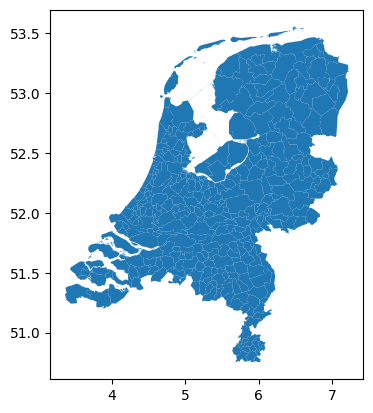

In [5]:
gdf.plot()

In [6]:
gdf

,gm_code,gm_naam,geometry
0,GM0003,Appingedam,"POLYGON ((6.80583 53.31703, 6.80588 53.31704, ..."
1,GM0010,Delfzijl,"MULTIPOLYGON (((7.07833 53.26658, 7.07826 53.2..."
2,GM0014,Groningen,"POLYGON ((6.48047 53.24551, 6.48050 53.24579, ..."
3,GM0024,Loppersum,"POLYGON ((6.73921 53.38812, 6.73925 53.38815, ..."
4,GM0034,Almere,"MULTIPOLYGON (((5.21106 52.33159, 5.21106 52.3..."
...,...,...,...
350,GM1963,Hoeksche Waard,"MULTIPOLYGON (((4.57231 51.70007, 4.57053 51.6..."
351,GM1966,Het Hogeland,"MULTIPOLYGON (((6.29052 53.33942, 6.29052 53.3..."
352,GM1969,Westerkwartier,"POLYGON ((6.23175 53.25595, 6.23176 53.25599, ..."
353,GM1970,Noardeast-Fryslân,"MULTIPOLYGON (((6.17582 53.34599, 6.17582 53.3..."


## Data management

In [7]:
df.head()

,ID,StatusVanBewoning,RegioS,Perioden,TotaleWoningvoorraad_1,Koopwoningen_2,TotaalHuurwoningen_3,EigendomWoningcorporatie_4,EigendomOverigeVerhuurders_5,EigendomOnbekend_6
0,741,T001235,GM1680,2012JJ00,12414.0,8334.0,3204.0,1971.0,1233.0,876.0
1,742,T001235,GM1680,2013JJ00,11214.0,7963.0,3023.0,1995.0,1028.0,228.0
2,743,T001235,GM1680,2014JJ00,11173.0,7896.0,3110.0,1948.0,1162.0,167.0
3,744,T001235,GM1680,2015JJ00,11150.0,7869.0,3148.0,2098.0,1050.0,133.0
4,745,T001235,GM1680,2016JJ00,11131.0,7916.0,3045.0,1967.0,1078.0,170.0


In [8]:
# in df['perioden'] only keep the first 4 digits and change to int
df['Perioden'] = df['Perioden'].str[:4].astype(int)


In [9]:
df = df[['RegioS', 'Perioden', 'TotaleWoningvoorraad_1']]

In [10]:
# per df[RegionS] for each period the TotalHousing Stock_1 in separate column
df = df.groupby(['Perioden', 'RegioS'], as_index=False).agg({'TotaleWoningvoorraad_1': 'sum'})
df = df.pivot(index='Perioden', columns='RegioS', values='TotaleWoningvoorraad_1')


In [11]:
df = df.T.reset_index()

In [12]:
merged_df = df.merge(gdf, left_on='RegioS', right_on='gm_code')

In [13]:
# all 0 in merged_df must become NaN
merged_df = merged_df.replace(0, np.nan)

In [14]:
merged_df.drop(columns=['RegioS'], inplace=True)


## Save output

In [15]:
if SAVE_OUTPUT:
    merged_df.to_csv(OUTPUT_DATA_PATH, sep = ';', index = False)

## Watermark

In [16]:
!python -m pip install watermark --quiet

In [17]:
%load_ext watermark

In [18]:
%watermark

Last updated: 2025-01-27T11:12:17.962755+01:00

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.17.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [19]:
%watermark --iversions

numpy    : 1.26.1
geopandas: 0.14.0
pandas   : 2.1.2



In [20]:
!lsb_release -a

'lsb_release' is not recognized as an internal or external command,
operable program or batch file.
